#**Evidencia 3: Construccion de los tableros**

Iker Villalobos Gilling                   | A01710453

Juan Carlos Cárcamo Alarcón       | A01710253

José David Castillo Jasso              | A01710953

Ana Isabel García Mojica             | A01706241


In [ ]:
import pandas as pd
import numpy as np
import altair as alt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
telemetria = pd.read_excel('/content/Telemetría.xlsx', sheet_name='Report')

In [ ]:
peajes = pd.read_csv('/content/Peajes1.csv')

In [ ]:
listado_viajes = pd.read_excel('/content/BEPENSA.xlsx', sheet_name='Reporte Listado Viajes Ene-Oc')

In [ ]:
df_fuel_ene_feb = pd.read_excel('/content/Enero-febrero 2025 Combustible.xlsx')

In [ ]:
df_fuel_sep = pd.read_excel('/content/Septiembre 2025 Combustible.xlsx')

In [ ]:
df_fuel_ago = pd.read_excel('/content/Agosto Combustible.xlsx')

In [ ]:
df_pl = pd.read_excel('/content/tableropl.xlsx')

In [ ]:
df_base = listado_viajes.copy()

#**Graficos**

# Grafico 1

La gráfica 'Predicción SARIMA (Ejemplo) vs Datos Reales' muestra una comparación entre los datos de entrenamiento (últimos 90 días), los datos reales de prueba y la predicción generada por el modelo SARIMA. También incluye un intervalo de confianza del 95% para la predicción, lo que permite visualizar la incertidumbre asociada a la misma.

**Detalle del codigo**

* 1.- Inicialización: Configura una figura y dos ejes (ax1 y ax2) para un gráfico con doble eje Y, utilizando matplotlib.
* 2.- Eje Izquierdo (Nivel de Servicio):
Define el color y etiquetas para el eje Y izquierdo.
Grafica el 'Nivel de Servicio' contra el 'Tamaño de Flota Total' con una línea y marcadores.
Establece los límites del eje Y y añade una cuadrícula.
* 3.-Meta de Nivel de Servicio: Añade una línea horizontal que representa la meta del nivel de servicio.
* 4.- Eje Derecho (Ociosidad):
Define el color y etiquetas para el eje Y derecho (eje Y gemelo de ax1).
Grafica la 'Tasa de Ociosidad' contra el 'Tamaño de Flota Total' con una línea punteada y marcadores.
Establece los límites del eje Y para la ociosidad.
* 5.- Punto Óptimo:
Identifica los valores de flota, nivel de servicio y ociosidad óptimos (flota_optima, ns_optimo, ocio_optimo).
Dibuja una línea vertical para marcar la 'Flota_Total' óptima.
Añade un cuadro de texto en el gráfico con la información detallada de la solución óptima.
* 6.-Finalización: Establece el título principal del gráfico, ajusta el diseño y muestra el gráfico.


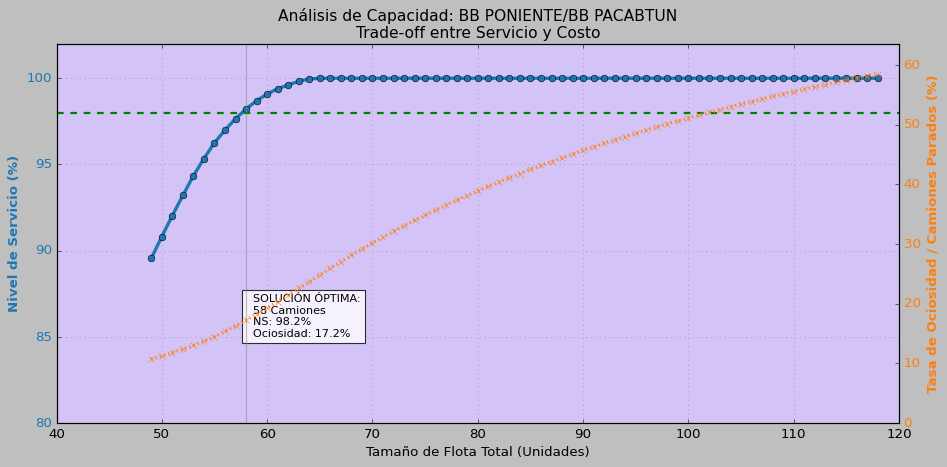

In [ ]:
#CREACIÓN DEL GRÁFICO
fig, ax1 = plt.subplots(figsize=(12, 6))

# Eje Izquierdo: Nivel de Servicio (Azul)
color_serv = 'tab:blue'
ax1.set_xlabel('Tamaño de Flota Total (Unidades)', fontsize=12)
ax1.set_ylabel('Nivel de Servicio (%)', color=color_serv, fontsize=12, fontweight='bold')
ax1.plot(df_curva['Flota_Total'], df_curva['Nivel_Servicio'], color=color_serv, linewidth=3, marker='o', label='Nivel Servicio')
ax1.tick_params(axis='y', labelcolor=color_serv)
ax1.set_ylim(80, 102)
ax1.grid(True, alpha=0.3)

# Línea de Meta (Verde)
ax1.axhline(META_NIVEL_SERVICIO, color='green', linestyle='--', linewidth=2, label=f'Meta {META_NIVEL_SERVICIO}%')

# Eje Derecho: Ociosidad (Naranja)
ax2 = ax1.twinx()
color_ocio = 'tab:orange'
ax2.set_ylabel('Tasa de Ociosidad / Camiones Parados (%)', color=color_ocio, fontsize=12, fontweight='bold')
ax2.plot(df_curva['Flota_Total'], df_curva['Tasa_Ociosidad'], color=color_ocio, linestyle=':', linewidth=3, marker='x', label='Ociosidad')
ax2.tick_params(axis='y', labelcolor=color_ocio)
ax2.set_ylim(0, df_curva['Tasa_Ociosidad'].max() + 5)

# 4. MARCADOR DEL PUNTO ÓPTIMO
flota_optima = datos_optimos['Flota_Total_Recomendada']
ns_optimo = datos_optimos['Nivel_Servicio_Logrado']
ocio_optimo = datos_optimos['Tasa_Ociosidad']

# Dibujar línea vertical en el óptimo
plt.axvline(flota_optima, color='gray', alpha=0.5)

# Texto informativo en el gráfico
texto_info = (f"  SOLUCIÓN ÓPTIMA:\n"
              f"  {flota_optima:.0f} Camiones\n"
              f"  NS: {ns_optimo:.1f}%\n"
              f"  Ociosidad: {ocio_optimo:.1f}%")

# Colocamos el texto cerca de la línea óptima
ax1.text(flota_optima, 85, texto_info, bbox=dict(facecolor='white', alpha=0.8), fontsize=10)

plt.title(f'Análisis de Capacidad: {ruta_a_graficar}\nTrade-off entre Servicio y Costo', fontsize=14)
fig.tight_layout()
plt.show()

# Grafico 2

La gráfica 'Costo Mensual de Buffer por Ruta y Estrategia Sugerida (Top 20)' tiene como objetivo mostrar las 20 rutas con el mayor costo mensual de buffer. Para cada una de estas rutas, se visualiza su costo mensual de buffer y se diferencia mediante colores la 'Estrategia Sugerida'. Esto permite identificar rápidamente las rutas más costosas y la estrategia asociada a cada una.

**Detalle del codigo**

* 1.- Creación del Gráfico de Barras: Utiliza Altair para crear un gráfico de barras a partir de las primeras 20 filas del DataFrame df_vista_final.
* 2.- Eje X (Ruta): Define la 'Ruta' en el eje X, ordenando las barras de forma descendente según el 'Costo_Mensual_Buffer'. No muestra el eje X para mantener la limpieza.
* 3.-Eje Y (Costo Mensual de Buffer): Define el 'Costo_Mensual_Buffer' en el eje Y, con formato de moneda.
* 4.-Colores y Leyenda: Asigna colores a las barras según la 'Estrategia_Sugerida', generando una leyenda automáticamente.
* 5.- Información Interactiva (Tooltips): Configura ventanas emergentes (tooltips) para mostrar 'Ruta', 'Costo_Mensual_Buffer' y 'Estrategia_Sugerida' al pasar el ratón por encima de cada barra.
* 6.-Título: Asigna el título 'Costo Mensual de Buffer por Ruta y Estrategia Sugerida (Top 20)' al gráfico.
* 7.-Interactividad: Hace el gráfico interactivo, permitiendo hacer zoom y paneo.

In [ ]:
chart = alt.Chart(df_vista_final.head(20)).mark_bar().encode(
    x=alt.X('Ruta', sort=alt.EncodingSortField(field="Costo_Mensual_Buffer", op="sum", order="descending"), axis=None),
    y=alt.Y('Costo_Mensual_Buffer', title='Costo Mensual de Buffer (MXN)', axis=alt.Axis(format='$,.2f')),
    color=alt.Color('Estrategia_Sugerida', title='Estrategia Sugerida'),
    tooltip=[
        alt.Tooltip('Ruta', title='Ruta'),
        alt.Tooltip('Costo_Mensual_Buffer', title='Costo Mensual Buffer', format='$,.2f'),
        alt.Tooltip('Estrategia_Sugerida', title='Estrategia Sugerida')
    ]
).properties(
    title='Costo Mensual de Buffer por Ruta y Estrategia Sugerida (Top 20)'
).interactive()

chart

alt.Chart(...)

# Grafico 3

La gráfica 'Costo Mensual de Buffer por Ruta y Estrategia Sugerida (Top 20)' tiene como objetivo mostrar las 20 rutas con el mayor costo mensual de buffer. Para cada una de estas rutas, se visualiza su costo mensual de buffer y se diferencia mediante colores la 'Estrategia Sugerida'. Esto permite identificar rápidamente las rutas más costosas y la estrategia asociada a cada una.

**Detalle codigo**

* 1.-Importa librerías necesarias como pandas y matplotlib.
* 2.- Carga y prepara datos de listado_viajes, telemetria y km.
*3.- Filtra los viajes para una ruta específica (BB PACABTUN/BB PONIENTE).
* 4.-Encuentra el período de telemetría al que corresponde cada viaje.
* 5.- Calcula la distancia total recorrida por los camiones de esa ruta en cada período.
* 6.- Crea un gráfico de barras (matplotlib) que visualiza la distancia total (en kilómetros) para la ruta seleccionada, agrupada por período de telemetría. Esto ayuda a entender el uso de los vehículos a lo largo del tiempo para una ruta específica.
* 7.- Imprime la tabla con los datos de distancia total por período.


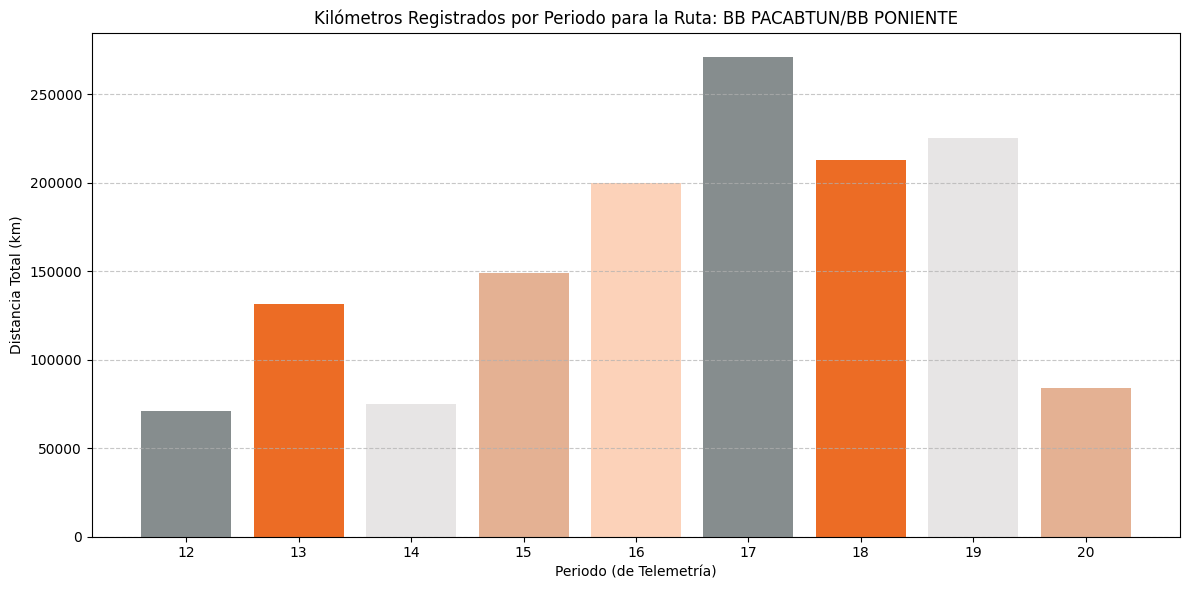

Distancia total registrada por periodo para la ruta 'BB PACABTUN/BB PONIENTE':


,Periodo,Distancia
0,12,70903.600220
1,13,131684.718872
2,14,75052.553711
3,15,148767.008301
4,16,200098.790039
5,17,271147.154602
6,18,213091.191650
7,19,225358.579773
8,20,84014.090820


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

df = listado_viajes.copy()


telemetria_periods_info = telemetria[['Periodo', 'Fecha de inicio del periodo', 'Fecha de fin del periodo']].drop_duplicates().sort_values('Fecha de inicio del periodo')

def find_period_for_date(date, periods_info):
    matching_periods = periods_info[
        (periods_info['Fecha de inicio del periodo'] <= date) &
        (periods_info['Fecha de fin del periodo'] >= date)
    ]
    if not matching_periods.empty:
        return matching_periods['Periodo'].iloc[0]
    return None


route_to_analyze = "BB PACABTUN/BB PONIENTE"
route_trips = df[df['Ruta'] == route_to_analyze].copy()
route_trips['Matched_Periodo'] = route_trips['Fecha Salida'].apply(lambda x: find_period_for_date(x, telemetria_periods_info))
route_trips.dropna(subset=['Matched_Periodo'], inplace=True)

route_trips['Matched_Periodo'] = route_trips['Matched_Periodo'].astype(int)

route_trips_for_merge = route_trips[['Tractocamión', 'Matched_Periodo']].drop_duplicates().rename(columns={'Tractocamión': 'Nombre', 'Matched_Periodo': 'Periodo'})

merged_distances = pd.merge(route_trips_for_merge, km, on=['Nombre', 'Periodo'], how='left')
merged_distances.dropna(subset=['Distancia'], inplace=True)

km_by_period_for_route = merged_distances.groupby('Periodo')['Distancia'].sum().reset_index()

km_by_period_for_route.sort_values('Periodo', inplace=True)

new_monochromatic_palette = ["#868d8e", "#ec6c25", "#e7e5e5", "#e4b193", "#fcd2b9"]

plt.figure(figsize=(12, 6))

num_periods = len(km_by_period_for_route['Periodo'].unique())
colors_for_bars = [new_monochromatic_palette[i % len(new_monochromatic_palette)] for i in range(num_periods)]
plt.bar(km_by_period_for_route['Periodo'], km_by_period_for_route['Distancia'], color=colors_for_bars)
plt.xlabel('Periodo (de Telemetría)')
plt.ylabel('Distancia Total (km)')
plt.title(f'Kilómetros Registrados por Periodo para la Ruta: {route_to_analyze}')
plt.xticks(km_by_period_for_route['Periodo'].unique()) # Ensure all period numbers are shown as ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print the data as well
print(f"Distancia total registrada por periodo para la ruta '{route_to_analyze}':")
display(km_by_period_for_route)

#**Enlace al Prototipo Online**

https://www.figma.com/design/Jj77NFA7JYRwnEBbx1gZeQ/Landing-Bepensa?node-id=220-352&t=WzhoK9n3zoMiYJWa-1



#**Enlace video**